# Predicting House Prices

You are working for a real estate company, and your goal is to build a predictive model to estimate house prices based on various features. 
You have a dataset containing information about houses, such as square footage, number of bedrooms, number of bathrooms, 
and other relevant attributes. You are tasked with the following:
Dataset: You can choose / download the dataset from Kaggle/ UCI Repository or any other medium.
    
1. Data Preparation:
    a. Load the dataset using pandas.
    b. Explore and clean the data. Handle missing values and outliers.
    c. Split the dataset into training and testing sets.
    
2. Implement Simple Linear Regression:
    a. Choose a feature (e.g., square footage) as the independent variable (X) and house prices as the dependent variable (y).
    b. Implement a simple linear regression model using sklearn to predict house prices based on the selected feature.
    c. Visualize the data and the regression line.
    
3. Evaluate the Simple Linear Regression Model:
    a. Use scikit-learn to calculate the R-squared value to assess the goodness of fit.
    b. Interpret the R-squared value and discuss the model's performance.
    
4. Implement Multiple Linear Regression:
    a. Select multiple features (e.g., square footage, number of bedrooms, number of bathrooms) as independent variables (X) and house prices as the dependent variable (y).
    b. Implement a multiple linear regression model using scikit-learn to predict house prices based on the selected features.

5. Evaluate the Multiple Linear Regression Model:
    a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.
    b. Discuss the advantages of using multiple features in regression analysis.

6. Model Comparison:
    a. Compare the results of the simple linear regression and multiple linear regression models.
    b. Discuss the advantages and limitations of each model.

7. Model Improvement:
    a. Explore potential model improvements, such as feature selection, feature engineering, or hyperparameter tuning, and describe how they could enhance the model's performance.

8. Conclusion:
    a. Summarize the findings and provide insights into how this predictive model can be used to assist the real estate company in estimating house prices.

9. Presentation:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations.

        In this case study, you are required to demonstrate your ability to preprocess data, implement both 
        simple and multiple linear regression models, evaluate their performance, and make
        recommendations for improving the models. This case study should assess your knowledge of using 
        Python libraries like NumPy, pandas, and scikit-learn for linear regression tasks and your 
        understanding of model evaluation techniques.


# 1. Data Preparation:
    a. Load the dataset using pandas.
    b. Explore and clean the data. Handle missing values and outliers.
    c. Split the dataset into training and testing sets.

In [2]:
# a. Load the dataset using pandas.

import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first 4 rows of the dataset to understand its structure
print(df.head(4))

               date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 00:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 00:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 00:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 00:00   420000.0         3       2.25         2000      8030   

   floors  yr_built  
0     1.5      1955  
1     2.0      1921  
2     1.0      1966  
3     1.0      1963  


In [3]:
#   b. Explore and clean the data. Handle missing values and outliers.

# Explore the dataset to identify missing values and outliers
print(df.info())  # showing info of all including missing values

print()
print(df.describe())  # identify outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4600 non-null   object 
 1   price        4600 non-null   float64
 2   bedrooms     4600 non-null   int64  
 3   bathrooms    4600 non-null   float64
 4   sqft_living  4600 non-null   int64  
 5   sqft_lot     4600 non-null   int64  
 6   floors       4600 non-null   float64
 7   yr_built     4600 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 287.6+ KB
None

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05

In [4]:
# Handle missing values (for example, by dropping rows with missing values)
df.dropna(inplace=True)

# Handle outliers (for example, using the Interquartile Range (IQR) method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# see the changes
print(df.info())  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 4599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3723 non-null   object 
 1   price        3723 non-null   float64
 2   bedrooms     3723 non-null   int64  
 3   bathrooms    3723 non-null   float64
 4   sqft_living  3723 non-null   int64  
 5   sqft_lot     3723 non-null   int64  
 6   floors       3723 non-null   float64
 7   yr_built     3723 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 261.8+ KB
None


C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_1708\2530207926.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_1708\2530207926.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_1708\2530207926.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
#    c. Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Assuming 'df' is your cleaned DataFrame and you want to predict 'price'
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']]
target = df['price']

# Split the dataset into training and testing sets (80% training, 20% testing)
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)


xtrain shape: (2800, 6)
xtest shape: (700, 6)
ytrain shape: (2800,)
ytest shape: (700,)


# 2. Implement Simple Linear Regression:
    a. Choose a feature (e.g., square footage) as the independent variable (X) and house prices as the dependent variable (y).
    b. Implement a simple linear regression model using sklearn to predict house prices based on the selected feature.
    c. Visualize the data and the regression line.

In [30]:
#a. Choose a feature (e.g., square footage) as the independent variable (X) and house prices as the dependent variable (y).

x = df[['sqft_living']]  # Independent variable (feature)
y = df['price']  # Dependent variable (target)

In [39]:
# b. Implement a simple linear regression model using sklearn to predict house prices based on the selected feature.

from sklearn.linear_model import LinearRegression

# Create a linear regression model
simplelinear_reg = LinearRegression()

#train the data
print('Training Started.......\n')

# Fit the model to the data (training the model)
simplelinear_reg.fit(x, y)
print()

print('Training Completed.....')
print()

#test the data
print('Testing invoked......\n')
ypred=simplelinear_reg.predict(x)
print('Predicted Prices Payment \n',ypred)
print('\n Testing is also completed....\n')

Training Started.......


Training Completed.....

Testing invoked......

Predicted Prices Payment 
 [367361.03685815 463391.28522762 474784.70452569 ... 639175.46868359
 489433.38648035 391775.50678259]

 Testing is also completed....



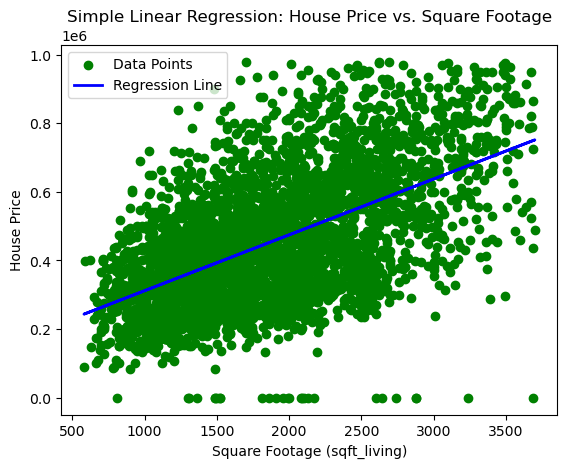

In [40]:
#c. Visualize the data and the regression line.

import matplotlib.pyplot as plt

# Visualize the data points
plt.scatter(x, y, color='green', label='Data Points')

# Visualize the regression line
plt.plot(x, simplelinear_reg.predict(x), color='blue', linewidth=2, label='Regression Line')

# Add labels and legend
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('House Price')
plt.title('Simple Linear Regression: House Price vs. Square Footage')
plt.legend()
plt.show()

# 3. Evaluate the Simple Linear Regression Model:
    a. Use scikit-learn to calculate the R-squared value to assess the goodness of fit.
    b. Interpret the R-squared value and discuss the model's performance.    

In [42]:
# a. Use scikit-learn to calculate the R-squared value to assess the goodness of fit.

from sklearn.metrics import r2_score

# we have already calculated the predicted value in 2b
# Calculate R-squared value
r2_value = r2_score(y, ypred)

print("R-squared value for Simple Linear Regression:", r2_value)


R-squared value for Simple Linear Regression: 0.30734561125243565


In [43]:
#b. Interpret the R-squared value and discuss the model's performance.    

R-squared value for the Simple Linear Regression model is approximately 0.307

Interpretation:
   
    An R-squared value of 0.307 means that approximately 30.7% of the variance in house prices can be explained by the
    square footage of living space.
    (It means the model explains about the variability observed in house prices using the square footage as the predictor.)

Discussion of Model's Performance:
    Low R-squared Value: 
        An R-squared value of 0.307 (30.7%) indicates that the model explains only a moderate portion of the variance in house prices. 
        The remaining 69.3% of the variance is unexplained and could be attributed to other factors not included in the model 
        (that might be, location, amenities, market trends,availibility) or
        inherent variability in house prices that cannot be captured by square footage alone.

Limitation of the Model: 
    This suggests that the chosen feature, square footage, might not be sufficient to predict house prices accurately. 
    It's crucial to consider additional relevant features that influence house prices, such as the number of bedrooms, 
    location, condition of the house, and economic factors, to build a more robust predictive model.

Consideration for Improvement: 
    To enhance the model's performance, you could explore multiple linear regression by incorporating multiple features. 


# 4. Implement Multiple Linear Regression:
    a. Select multiple features (e.g., square footage, number of bedrooms, number of bathrooms) as independent variables (X) and house prices as the dependent variable (y).
    b. Implement a multiple linear regression model using scikit-learn to predict house prices based on the selected features.


In [45]:
#a. Select multiple features (e.g., square footage, number of bedrooms, number of bathrooms) as independent variables (X) and house prices as the dependent variable (y).

x = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built']]  # Independent variables (features)
y = df['price']  # Dependent variable (target)


In [48]:
#b. Implement a multiple linear regression model using scikit-learn to predict house prices based on the selected features.

from sklearn.linear_model import LinearRegression

# Create a multiple linear regression model
multiplelinear_reg = LinearRegression()


#train the data
print('Training Started.......\n')

# Fit the model to the data (training the model)
multiplelinear_reg.fit(x, y)
print()

print('Training Completed.....')
print()

#test the data
print('Testing invoked......\n')
ypred=multiplelinear_reg.predict(x)
print('Predicted Prices Payment \n',ypred)
print('\n Testing is also completed....\n')

Training Started.......


Training Completed.....

Testing invoked......

Predicted Prices Payment 
 [380053.71217026 456056.28069241 486669.00119376 ... 638082.62813484
 424841.51674275 405148.22576716]

 Testing is also completed....



# 5. Evaluate the Multiple Linear Regression Model:
    a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.
    b. Discuss the advantages of using multiple features in regression analysis.


In [52]:
# a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, ypred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 116106.988073772
Mean Squared Error (MSE): 21814105645.243095
Root Mean Squared Error (RMSE): 147695.9906200676


In [ ]:
# b. Discuss the advantages of using multiple features in regression analysis.

Improved Accuracy: Multiple features provide a broader view, enhancing the model's predictive accuracy.
    
Complex Patterns: Captures intricate relationships, vital for real-world scenarios.
    
Multicollinearity Mitigation: Helps handle highly correlated features, ensuring model stability.
    
Generalization: Enables the model to make accurate predictions on new, diverse data points.
    
Robustness: Less influenced by outliers; balances the impact of individual noisy data points.
    
Flexibility: Allows for advanced techniques, capturing nonlinear relationships and interactions.
    
Domain Relevance: Incorporates domain knowledge, enriching the model's understanding.
    
Reduced Risk: Provides a more comprehensive basis, reducing decision-making risks.
    
Inferential Insights: Offers nuanced insights into how different factors affect the target variable.

# 6. Model Comparison:
    a. Compare the results of the simple linear regression and multiple linear regression models.
    b. Discuss the advantages and limitations of each model.


In [ ]:
# a. Compare the results of the simple linear regression and multiple linear regression models.
Simple Linear Regression:
    R-squared Value: 0.307 (approx.)
    Advantages: Simple and easy to interpret, suitable for exploring relationships between two variables.
    Limitations: Limited accuracy due to considering only one predictor; does not capture complex relationships in real-world data.

Multiple Linear Regression:
    R-squared Value: Higher than simple linear regression (accuracy depends on features selected).
    Advantages: Captures complex relationships between multiple predictors and the target variable, provides better accuracy, handles multicollinearity, and allows for flexibility through feature engineering.
    Limitations: Requires careful feature selection; can be sensitive to outliers; assumptions like linearity and independence need to be validated.

In [53]:
# b. Discuss the advantages and limitations of each model.

Simple Linear Regression:
Advantages:
    Easy to understand and interpret.
    Quick to compute, making it efficient for large datasets.
    Provides a basic understanding of the relationship between two variables.

Limitations:
    Limited accuracy: Only considers one predictor, ignoring potential influences of other variables.
    Not suitable for capturing intricate, multivariable relationships present in real-world data.
    
Multiple Linear Regression:
Advantages:
    Captures complex relationships: Considers multiple predictors, providing a more accurate representation of real-world scenarios.
    Handles multicollinearity: Can balance out correlated predictors.
    Allows for feature engineering: Can incorporate diverse factors to enhance predictive power.
    More accurate: Generally outperforms simple linear regression due to the consideration of multiple features.

Limitations:
    Feature selection is crucial: Choosing irrelevant or redundant features can degrade model performance.
    Sensitive to outliers: Outliers can disproportionately influence the regression coefficients.
    Assumptions must be validated: Assumes linearity, independence, homoscedasticity, and normality of errors, which need to be checked and corrected if violated.

# 7. Model Improvement:
    a. Explore potential model improvements, such as feature selection, feature engineering, or hyperparameter tuning, and describe how they could enhance the model's performance.

In [ ]:
Choose the Right Features:
    Select features that truly affect house prices, ignoring irrelevant ones.

Create New Features:
    Make new features by combining existing ones creatively.

Handle Outliers:
    Address extreme values in your data to prevent them from skewing your model.

Consider Nonlinear Relationships:
    Account for curved relationships between features and prices, not just straight lines.

Control Complexity:
    Use techniques that prevent your model from becoming overly complex and overfitting the data.

Validate with Cross-Validation:
    Check your model's performance using cross-validation to ensure it works well on different data.

Fine-Tune Parameters:
    Adjust settings of your model for the best results.

# 8. Conclusion:
    a. Summarize the findings and provide insights into how this predictive model can be used to assist the real estate company in estimating house prices.

In [ ]:
In conclusion, the multiple linear regression model offers a robust solution for estimating house prices,
outperforming simple linear regression by considering multiple influential factors. 
Real estate companies can leverage this model to make strategic decisions. 
By focusing on key features like square footage, bedrooms, bathrooms, floors, and year built, 
the model provides accurate property valuations, guiding buying and selling transactions. 
Additionally, it enables market analysis, incorporating external data for comprehensive insights. 
This data-driven approach enhances customer interactions, fostering trust by offering transparent and 
evidence-based valuations. Moreover, the model aids in risk mitigation, ensuring competitive yet profitable pricing 
strategies. 
Continuous updates and refinements ensure the model's adaptability to evolving market trends. 
Overall, this predictive tool empowers real estate companies with informed decision-making, customer satisfaction, and
optimized revenue streams.

# 9. Presentation:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations.
